In [60]:
#now we will code our own linear regression , this will have some functions 
# predict function , score function ,cost function , fit function
import numpy as np

In [61]:
data = np.loadtxt("C:\Abhinav\Course\CN\Downloaded NB\Linear Regression\data.csv", delimiter = ",") #by default delimiter is space

#data.shape() gives (100,2)

x = data[:,0] #this is done to make it a 2d array as sklearn doesnt accept 1d array for features
y = data[:,1]

In [62]:
def fitfunc(x,y): #this is xtrain and ytrain np arrays
    #print((x*y).mean())
    print(x.mean(), y.mean(), (x*x).mean(), (x*y).mean())
    m = ((x*y).mean() - x.mean()*y.mean())/((x*x).mean()-x.mean()*x.mean())
    #print(m)
    c = y.mean() - m*(x.mean())
    return m , c

In [63]:
def pred (x,m,c): # we have calculated the values of m,c from fit function , then we use for predicting new array for test data
    y = m*x+c
    return y

In [74]:
def cost (x,y,m,c): #this is used to calculate mean squared error
    ypred = pred(x,m,c)
    ypred = (ypred - y)**2
    costsum = ypred.mean()
    return costsum

In [65]:
def scorefunc(ypred,ytrue):
    u = ((ypred - ytrue)**2).sum()
    v = ((ytrue - ytrue.mean())**2).sum()
    return 1 - (u/v)

In [76]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y) #75% split by default

In [77]:
slope,intercept = fitfunc(x_train,y_train)
print(slope,intercept)

49.40898929389282 73.17458432026513 2539.6885513420484 3739.628291522056
1.2611298682503407 10.863432161675576


In [78]:
y_pred = pred(x_test,slope,intercept)
#print(y_pred)

In [79]:
costval =  cost(x_test,y_test,slope,intercept)
print(costval)

108.89706684038325


In [80]:
ypred = pred(x_test,slope,intercept)
scoreval =  scorefunc(ypred,y_test)
print(scoreval)
ypredtrain =  pred(x_train,slope,intercept)
scoreontrain =  scorefunc(ypredtrain,y_train)
print(scoreontrain)

0.6286640258219929
0.5847003322877742


1.2611298682503407 10.863432161675576


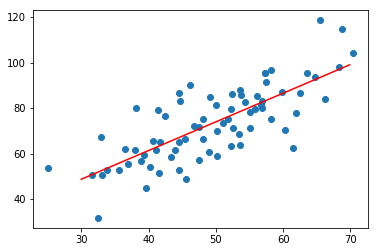

In [81]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
x_line = np.arange(30,70,0.1)
#print(x_line)
print(slope,intercept)
y_line = (slope*x_line) + intercept
#print(y_line)
plt.plot(x_line,y_line,color = "red")
plt.show()